In [39]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

import tensorflow as tf
from tensorflow import keras

import scipy.stats as stats

import my_module

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

sns.set_theme(style='darkgrid')

cm = px.colors.sequential.Emrld

warnings.filterwarnings('ignore')


In [71]:
train = pd.read_csv('train.csv')
train.drop(['Id'], axis=1, inplace=True)

test = pd.read_csv('test.csv')
test_ID = test['Id']

test.drop(['Id'], axis=1, inplace=True)

df = pd.concat([train, test], ignore_index=True)

df.tail()


1459


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,160,RM,21.00,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.00,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.00,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.00,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,60,RL,74.00,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


<h1> 1. EDA </h1>


No EDA at all, this is the first try


<h1> 2. Preprocessing </h1>


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

As the first attemp, I will delete all columns with a lot of nan values


In [42]:
df = my_module.delete_nan_column(df, 0.25)

numeric_features = my_module.get_type_features(df, ['int64', 'float64'])
categorical_features = my_module.get_type_features(df, ['object'])


In [43]:
px.imshow(df[numeric_features].corr(),
          color_continuous_scale=cm, width=1000, height=1000)


In [44]:
px.imshow(df[numeric_features].corr()[
          ['SalePrice']].T, color_continuous_scale=cm)


Get the features with predictive power


In [45]:
predictive_features = my_module.get_corr_features(
    df[numeric_features].corr()['SalePrice'], 0.5)
df_final = df[predictive_features].copy(deep=True)


In [46]:
scaler = preprocessing.StandardScaler()
df_final[df_final.columns[:-1]] = scaler.fit_transform(df_final.iloc[:, :-1])
df_final


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,0.65,1.05,0.90,-0.44,-0.77,0.41,0.78,0.99,0.31,0.35,208500.00
1,-0.06,0.15,-0.40,0.48,0.26,-0.47,0.78,-0.29,0.31,-0.06,181500.00
2,0.65,0.98,0.85,-0.30,-0.61,0.56,0.78,-0.29,0.31,0.63,223500.00
3,0.65,-1.86,-0.68,-0.67,-0.51,0.43,-1.03,0.35,1.62,0.79,140000.00
4,1.36,0.95,0.75,0.21,-0.04,1.38,0.78,1.62,1.62,1.69,250000.00
...,...,...,...,...,...,...,...,...,...,...,...
2914,-1.48,-0.04,-0.68,-1.15,-1.56,-0.81,-1.03,-0.93,-2.32,-2.20,NaN
2915,-1.48,-0.04,-0.68,-1.15,-1.56,-0.81,-1.03,-0.29,-1.01,-0.87,NaN
2916,-0.77,-0.37,0.56,0.39,0.16,-0.55,-1.03,0.35,0.31,0.48,NaN
2917,-0.77,0.68,0.37,-0.32,-0.48,-1.05,-1.03,-0.29,-2.32,-2.20,NaN


<h1> 3. Model development </h1>


<h2> 3.1 Baseline </h2>


As we predict a continues value, we can use a mean value as a baseline


In [47]:
df_final.columns


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

After testing, I kept some the most predictive features


In [48]:
features = ['OverallQual', 'GrLivArea',
            'YearBuilt', 'GarageCars', 'SalePrice']

df_features = df_final[features]

rng = 0
x = df_features[~df_features['SalePrice'].isna()][df_features.columns[:-1]]
y = df_features[~df_features['SalePrice'].isna()]['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=rng)


In [49]:
my_module.check_distribution(x_train, x_test)


,OverallQual,GrLivArea,YearBuilt,GarageCars
0,True,True,True,True


In [50]:
mean_price = np.full(len(x), np.mean(y))
my_module.print_evaluate_regression(mean_price, y)


MAE: 57434.77027584912
MSE: 6306788585.349299
RMSE: 79415.29188606751
R2 Square -1.8614354393748998e+30
______


<h2> 3.2 Simple model with a few features with predictive power </h2>


In [51]:
x_train.head()


,OverallQual,GrLivArea,YearBuilt,GarageCars
618,2.06,0.65,1.18,1.62
870,-0.77,-1.20,-0.31,-1.01
92,-0.77,-1.06,-1.66,0.31
817,1.36,0.37,1.01,1.62
302,0.65,0.08,0.98,1.62


Final training loss: 1455016832.0
Final Validation loss: 929699584.0
10/10 [==============================] - 0s 1ms/step
MAE: 26002.46163313356
MSE: 1877119594.045056
RMSE: 43325.73824004683
R2 Square 0.6801808988661575
______


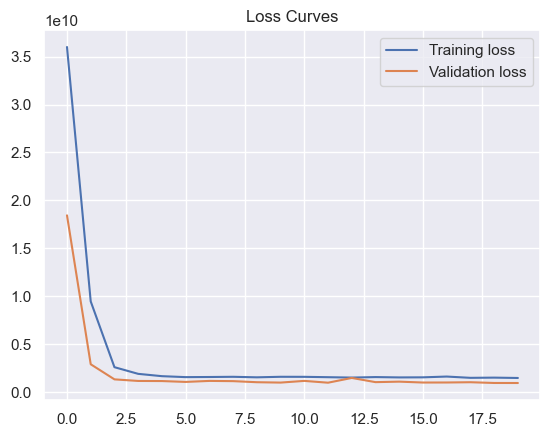

In [52]:
learning_rate = 1
epochs = 20
batch_size = 50

model = None

# Define model
model = keras.Sequential()
model.add(keras.layers.Dense(
    units=x_train.shape[1], activation='relu', input_dim=x_train.shape[1]))
model.add(keras.layers.Dense(
    units=x_train.shape[1], activation='relu', input_dim=x_train.shape[1]))

model.add(keras.layers.Dense(units=1, activation='linear'))
# Specify the optimizer using the TF API to specify the learning rate
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='mse')
# Train the model
trainHistory = model.fit(x_train,
                         y_train,
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_split=0.2,
                         verbose=0)
# Plot
my_module.showRegressionResults(trainHistory)

# write a finction to log results in the file

my_module.print_evaluate_regression(model.predict(x_test), y_test)


In [77]:
x_sub = df_final.loc[df_final['SalePrice'].isna()][features[:-1]]
pred = [el[0] for el in model.predict(x_sub, batch_size=batch_size)]

pd.DataFrame({
    'PassengerId': test_ID,
    'Survived': pred
}).to_csv('submission.csv', index=False)


30/30 [==============================] - 0s 1ms/step
